# Memory Profiling plots

We plot the runtime and memory allocation as a function of the number of rows in the dataframe used in tab_err

We look at the following error types for numeric and string data:

- Numeric: MissingValue (numeric), AddDelta

- String: MissingValue (string), Typo


## Read in data

In [404]:
import pandas as pd
import json
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

### Read in memory

In [405]:
with open('first_ten_num.json', 'r') as f:
    data = json.load(f)

num_mem = pd.DataFrame(data)

with open('first_ten_str.json', 'r') as f:
    data = json.load(f)

str_mem = pd.DataFrame(data)

In [406]:
# Convert total_memory to float MB
def parse_memory(mem_str):
    match = re.match(r"([0-9.]+)([KMG]?B)", mem_str.strip())
    if not match:
        return None
    value, unit = match.groups()
    value = float(value)
    unit = unit.upper()
    if unit == "B":
        return value / 1_000_000
    elif unit == "KB":
        return value / 1_000
    elif unit == "MB":
        return value
    elif unit == "GB":
        return value * 1_000
    else:
        return None


In [407]:
# Preprocess Numeric
num_mem["total_memory_MB"] = num_mem["total_memory"].apply(parse_memory)
num_mem.drop(columns=["total_memory", "runnumber", "runnnumber", "filepath"], inplace=True)

num_mem.loc[num_mem["type"] == "MissingValue", "type"] = "MissingValueNumeric"

num_mem

,mechanism,type,rate,nrow,ncol,total_memory_MB
0,EAR,MissingValueNumeric,0.75,100000,4,35.305000
1,EAR,MissingValueNumeric,0.90,100000,8,51.892000
2,ENAR,MissingValueNumeric,0.10,100,8,0.020523
3,ECAR,AddDelta,0.10,1000000,6,123.632000
4,EAR,AddDelta,0.90,100,10,0.053336
...,...,...,...,...,...,...
7495,EAR,MissingValueNumeric,0.25,100,8,0.040906
7496,ECAR,MissingValueNumeric,0.75,100000,10,17.701000
7497,ENAR,MissingValueNumeric,0.25,10000,10,2.423000
7498,ECAR,MissingValueNumeric,0.50,1000,4,0.121609


In [408]:
# String
str_mem["total_memory_MB"] = str_mem["total_memory"].apply(parse_memory)
str_mem.drop(columns=["total_memory", "runnumber", "runnnumber", "filepath"], inplace=True)

str_mem.loc[str_mem["type"] == "MissingValue", "type"] = "MissingValueString"

str_mem

,mechanism,type,rate,nrow,ncol,total_memory_MB
0,EAR,Typo,0.90,1000000,6,4881.000000
1,EAR,MissingValueString,0.75,100000,4,34.076000
2,EAR,MissingValueString,0.90,100000,8,48.662000
3,ECAR,Typo,0.25,1000,6,1.353000
4,ENAR,MissingValueString,0.10,100,8,0.030680
...,...,...,...,...,...,...
7495,EAR,MissingValueString,0.25,100,8,0.048648
7496,ECAR,MissingValueString,0.75,100000,10,18.467000
7497,ENAR,MissingValueString,0.25,10000,10,2.908000
7498,ECAR,MissingValueString,0.50,1000,4,0.132008


### Read in time

In [409]:
num_time = pd.read_csv("numeric_times.csv")[:10]

str_time = pd.read_csv("string_times.csv")[:10]

In [410]:
num_time = num_time[[col for col in num_time.columns if ('AddDelta' in col) or ('MissingValue' in col)]]
num_time

,EAR-AddDelta-0.1-100000-2,EAR-AddDelta-0.1-100000-4,EAR-AddDelta-0.25-100000-2,EAR-AddDelta-0.25-100000-4,EAR-AddDelta-0.5-100000-2,EAR-AddDelta-0.75-100000-2,EAR-AddDelta-0.9-100000-2,EAR-AddDelta-0.5-100000-4,EAR-AddDelta-0.1-100000-6,EAR-AddDelta-0.75-100000-4,...,ECAR-MissingValue-0.1-100-8,ECAR-MissingValue-0.25-100-8,ECAR-MissingValue-0.5-100-8,ECAR-MissingValue-0.9-100-8,ECAR-MissingValue-0.75-100-8,ECAR-MissingValue-0.1-100-10,ECAR-MissingValue-0.5-100-10,ECAR-MissingValue-0.25-100-10,ECAR-MissingValue-0.75-100-10,ECAR-MissingValue-0.9-100-10
0,0.138672,0.149656,0.127806,0.128190,0.141124,0.228837,0.233732,0.083609,0.071355,0.088469,...,0.003093,0.002883,0.002970,0.003183,0.002905,0.002954,0.002936,0.003016,0.002723,0.002875
1,0.088677,0.082312,0.063125,0.104253,0.104585,0.142417,0.117142,0.077266,0.063966,0.083861,...,0.002465,0.002254,0.002276,0.002670,0.002297,0.002296,0.002262,0.002255,0.002275,0.002277
2,0.072994,0.076603,0.066146,0.093437,0.097997,0.101595,0.103588,0.075944,0.061979,0.079495,...,0.002303,0.002231,0.002239,0.002730,0.002295,0.002273,0.002270,0.002244,0.002236,0.002249
3,0.071859,0.086650,0.063567,0.086659,0.096262,0.102693,0.084658,0.073838,0.065624,0.079905,...,0.002338,0.002243,0.002254,0.002676,0.002280,0.002247,0.002249,0.002257,0.002261,0.002275
4,0.063725,0.074896,0.062878,0.066920,0.072303,0.101084,0.086335,0.072751,0.066039,0.079493,...,0.002354,0.002249,0.002247,0.002607,0.002312,0.002367,0.002263,0.002230,0.002247,0.002234
5,0.057169,0.072397,0.060958,0.064195,0.076439,0.094720,0.080195,0.070241,0.070919,0.079775,...,0.002381,0.002227,0.002242,0.002609,0.002261,0.002424,0.002242,0.002259,0.002263,0.002267
6,0.066360,0.071080,0.062691,0.071822,0.069148,0.095945,0.085835,0.070142,0.070488,0.082731,...,0.002357,0.002257,0.002275,0.002550,0.002278,0.002414,0.002259,0.002235,0.002283,0.002280
7,0.059724,0.062428,0.063869,0.067336,0.067323,0.111656,0.086339,0.071804,0.066987,0.082627,...,0.002306,0.002232,0.002240,0.002570,0.002271,0.002475,0.002254,0.002274,0.002237,0.002251
8,0.057118,0.065245,0.059678,0.064583,0.070731,0.104105,0.084172,0.071926,0.064963,0.085136,...,0.002439,0.002249,0.002278,0.002647,0.002369,0.002456,0.002238,0.002231,0.002296,0.002290
9,0.057193,0.060457,0.058787,0.064310,0.073603,0.098899,0.099723,0.072911,0.071008,0.085428,...,0.002389,0.002225,0.002243,0.002583,0.002393,0.002790,0.002294,0.002252,0.002247,0.002247


In [411]:
str_time = str_time[[col for col in str_time.columns if ('MissingValue' in col) or ('Typo' in col)]]
str_time

,EAR-MissingValue-0.1-100000-2,EAR-MissingValue-0.25-100000-2,EAR-MissingValue-0.1-100000-4,EAR-MissingValue-0.25-100000-4,EAR-MissingValue-0.5-100000-2,EAR-MissingValue-0.75-100000-2,EAR-MissingValue-0.9-100000-2,EAR-MissingValue-0.5-100000-4,EAR-MissingValue-0.1-100000-6,EAR-MissingValue-0.25-100000-6,...,ECAR-Typo-0.75-1000000-4,ECAR-Typo-0.75-1000000-6,ECAR-Typo-0.75-1000000-10,ECAR-Typo-0.75-1000000-8,ECAR-Typo-0.75-1000000-2,ECAR-Typo-0.9-1000000-4,ECAR-Typo-0.9-1000000-2,ECAR-Typo-0.9-1000000-6,ECAR-Typo-0.9-1000000-8,ECAR-Typo-0.9-1000000-10
0,0.144119,0.229736,0.203094,0.170821,0.257337,0.294436,0.295146,0.182733,0.160131,0.167648,...,22.073701,22.742302,25.390622,23.011572,23.082474,26.785002,26.785406,26.723396,26.528084,27.047082
1,0.133604,0.203059,0.192536,0.164343,0.182221,0.249202,0.273923,0.177906,0.153533,0.161936,...,21.982669,21.974750,22.764915,22.031587,22.828947,26.832208,26.176489,26.447938,27.513976,27.095479
2,0.137775,0.179860,0.189603,0.157041,0.172387,0.193232,0.205343,0.179110,0.156031,0.164091,...,21.893911,22.013121,22.086835,22.110301,22.554087,26.771928,26.154299,26.330251,29.171402,26.995207
3,0.134050,0.146538,0.190254,0.156080,0.176673,0.193580,0.225833,0.178285,0.155030,0.162755,...,22.059596,22.068487,22.100263,22.082512,22.532433,26.936058,29.268428,26.488771,26.303263,27.057420
4,0.135637,0.145800,0.195329,0.160336,0.164803,0.187738,0.207395,0.176340,0.152091,0.162880,...,21.962875,22.086870,21.982046,22.077108,22.636504,27.020571,26.706354,26.376845,27.854154,27.003303
5,0.135112,0.143521,0.165512,0.160668,0.166554,0.190481,0.244132,0.179033,0.150901,0.163933,...,21.965299,22.167047,22.045197,22.041726,22.416782,26.927290,27.220282,26.378403,26.844666,26.919744
6,0.133995,0.143940,0.142495,0.170779,0.167862,0.190217,0.218187,0.177313,0.151851,0.165808,...,21.891941,22.097636,22.194540,22.044889,22.591606,26.767222,27.227732,26.256304,28.366073,27.607408
7,0.154865,0.144504,0.142627,0.159387,0.166257,0.190589,0.310465,0.177885,0.153439,0.166091,...,22.006324,22.087826,22.183702,22.053718,22.629087,26.806005,27.144859,26.604417,27.499116,27.094001
8,0.130708,0.142539,0.143224,0.158221,0.163488,0.186159,0.227251,0.182263,0.157709,0.162826,...,21.933099,22.219195,22.166982,22.996811,22.595927,26.810927,26.557623,26.498667,27.502534,27.224482
9,0.131349,0.144177,0.143092,0.160467,0.167248,0.189403,0.202015,0.178081,0.162928,0.168640,...,21.891537,21.960999,22.389412,23.205167,22.289402,26.719197,26.385699,26.433747,26.693921,26.850856


In [412]:
def wide_to_long(df, data_type: str = ""):
    df_long = df.melt(var_name="variable", value_name="seconds_runtime")

    split_cols = df_long["variable"].str.split("-", expand=True)
    
    mask = split_cols[1] == "MissingValue"
    split_cols.loc[mask, 1] = split_cols.loc[mask, 1] + data_type

    df_long['mechanism'] = split_cols[0]
    df_long['type'] = split_cols[1]
    df_long['rate'] = split_cols[2].astype(float)
    df_long['nrow'] = split_cols[3].astype(int)
    df_long['ncol'] = split_cols[4].astype(int)

    df_long = df_long[['mechanism', 'type', 'rate', 'nrow', 'ncol', 'seconds_runtime']]

    return df_long


In [413]:
num_time = wide_to_long(num_time, "Numeric")

num_time

,mechanism,type,rate,nrow,ncol,seconds_runtime
0,EAR,AddDelta,0.1,100000,2,0.138672
1,EAR,AddDelta,0.1,100000,2,0.088677
2,EAR,AddDelta,0.1,100000,2,0.072994
3,EAR,AddDelta,0.1,100000,2,0.071859
4,EAR,AddDelta,0.1,100000,2,0.063725
...,...,...,...,...,...,...
7495,ECAR,MissingValueNumeric,0.9,100,10,0.002267
7496,ECAR,MissingValueNumeric,0.9,100,10,0.002280
7497,ECAR,MissingValueNumeric,0.9,100,10,0.002251
7498,ECAR,MissingValueNumeric,0.9,100,10,0.002290


In [414]:
str_time = wide_to_long(str_time, "String")

str_time

,mechanism,type,rate,nrow,ncol,seconds_runtime
0,EAR,MissingValueString,0.1,100000,2,0.144119
1,EAR,MissingValueString,0.1,100000,2,0.133604
2,EAR,MissingValueString,0.1,100000,2,0.137775
3,EAR,MissingValueString,0.1,100000,2,0.134050
4,EAR,MissingValueString,0.1,100000,2,0.135637
...,...,...,...,...,...,...
7495,ECAR,Typo,0.9,1000000,10,26.919744
7496,ECAR,Typo,0.9,1000000,10,27.607408
7497,ECAR,Typo,0.9,1000000,10,27.094001
7498,ECAR,Typo,0.9,1000000,10,27.224482


# Prepare Dataframes

One memory, one time. The MissingValue name should be unique for each.

In [415]:
num_mem, str_mem

(     mechanism                 type  rate     nrow  ncol  total_memory_MB
 0          EAR  MissingValueNumeric  0.75   100000     4        35.305000
 1          EAR  MissingValueNumeric  0.90   100000     8        51.892000
 2         ENAR  MissingValueNumeric  0.10      100     8         0.020523
 3         ECAR             AddDelta  0.10  1000000     6       123.632000
 4          EAR             AddDelta  0.90      100    10         0.053336
 ...        ...                  ...   ...      ...   ...              ...
 7495       EAR  MissingValueNumeric  0.25      100     8         0.040906
 7496      ECAR  MissingValueNumeric  0.75   100000    10        17.701000
 7497      ENAR  MissingValueNumeric  0.25    10000    10         2.423000
 7498      ECAR  MissingValueNumeric  0.50     1000     4         0.121609
 7499       EAR             AddDelta  0.25  1000000     8       384.504000
 
 [7500 rows x 6 columns],
      mechanism                type  rate     nrow  ncol  total_memory_M

In [416]:
num_time, str_time

(     mechanism                 type  rate    nrow  ncol  seconds_runtime
 0          EAR             AddDelta   0.1  100000     2         0.138672
 1          EAR             AddDelta   0.1  100000     2         0.088677
 2          EAR             AddDelta   0.1  100000     2         0.072994
 3          EAR             AddDelta   0.1  100000     2         0.071859
 4          EAR             AddDelta   0.1  100000     2         0.063725
 ...        ...                  ...   ...     ...   ...              ...
 7495      ECAR  MissingValueNumeric   0.9     100    10         0.002267
 7496      ECAR  MissingValueNumeric   0.9     100    10         0.002280
 7497      ECAR  MissingValueNumeric   0.9     100    10         0.002251
 7498      ECAR  MissingValueNumeric   0.9     100    10         0.002290
 7499      ECAR  MissingValueNumeric   0.9     100    10         0.002247
 
 [7500 rows x 6 columns],
      mechanism                type  rate     nrow  ncol  seconds_runtime
 0        

## Create Statistical Graphics

Aggregate

In [417]:
df_runtime = pd.concat([num_time, str_time], ignore_index=True)

df_memory = pd.concat([num_mem, str_mem], ignore_index=True)

merge_cols = ["mechanism", "type", "rate", "nrow", "ncol"]
df_merged = pd.merge(df_runtime, df_memory, on=merge_cols)

string_types = ["MissingValueString", "Typo"]
numeric_types = ["MissingValueNumeric", "AddDelta"]

In [418]:
def plot_runtime_memory(df_runtime, df_memory, error_types, title):
    plt.style.use('default')  # clean style

    # Merge data
    df = pd.merge(df_runtime, df_memory, on=['mechanism', 'type', 'rate', 'nrow', 'ncol'])
    df = df[df['type'].isin(error_types)]
    df['label'] = df['mechanism'] + ' - ' + df['type']

    # Aggregate
    grouped = df.groupby(['label', 'mechanism', 'type', 'nrow'])[
        ['seconds_runtime', 'total_memory_MB']
    ].agg(['mean', 'std']).reset_index()
    grouped.columns = ['label', 'mechanism', 'type', 'nrow',
                       'runtime_mean', 'runtime_std',
                       'memory_mean', 'memory_std']

    # Line styles per type
    unique_types = grouped['type'].unique()
    linestyles = ['-', '--', '-.', ':']
    type_linestyles = {t: linestyles[i % len(linestyles)] for i, t in enumerate(unique_types)}

    # Colors per mechanism
    unique_mechs = grouped['mechanism'].unique()
    color_palette = plt.cm.tab10.colors
    mechanism_colors = {m: color_palette[i % len(color_palette)] for i, m in enumerate(unique_mechs)}

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 8), sharex=True, height_ratios=[1, 1.1])
    fig.suptitle(title)

    for label in grouped['label'].unique():
        subset = grouped[grouped['label'] == label]
        mech = subset['mechanism'].iloc[0]
        typ = subset['type'].iloc[0]

        color = mechanism_colors[mech]
        linestyle = type_linestyles[typ]

        ax1.errorbar(subset['nrow'], subset['runtime_mean'],
                     yerr=subset['runtime_std'],
                     fmt='o', linestyle=linestyle, color=color,
                     capsize=3)
        ax2.errorbar(subset['nrow'], subset['memory_mean'],
                     yerr=subset['memory_std'],
                     fmt='o', linestyle=linestyle, color=color,
                     capsize=3)

    # Labels & Scales
    ax1.set_ylabel('Runtime (s)')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    #ax1.grid(True, which='both', ls='--')

    ax2.set_xlabel('Number of Rows')
    ax2.set_ylabel('Memory (MB)')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    #ax2.grid(True, which='both', ls='--')

    # Custom legends
    mech_handles = [
        mlines.Line2D([], [], color=mechanism_colors[m], label=m)
        for m in unique_mechs
    ]
    type_handles = [
        mlines.Line2D([], [], color='black', linestyle=type_linestyles[t], label=t)
        for t in unique_types
    ]

    ax1.legend(handles=mech_handles, title='Mechanism', loc='upper left')
    ax1_2 = ax1.twinx()
    ax1_2.legend(handles=type_handles, title='Error Type', loc='upper center')
    ax1_2.axis('off')  # hide twin axis

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.style.use('default')
    plt.show()

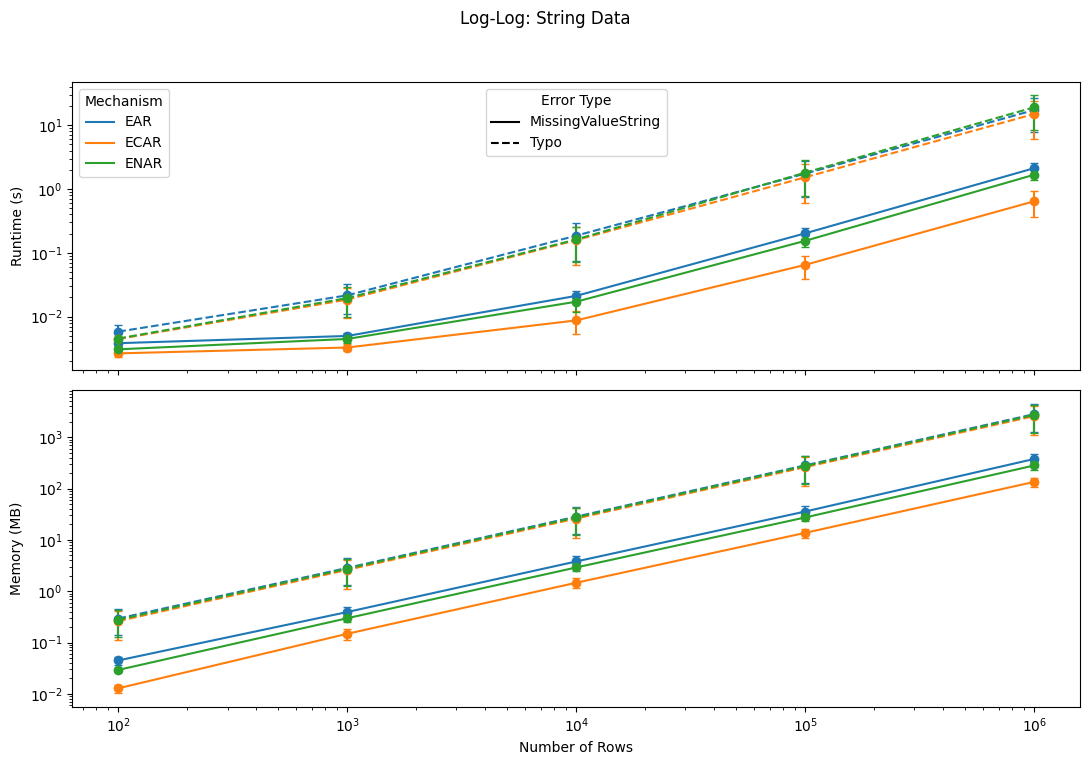

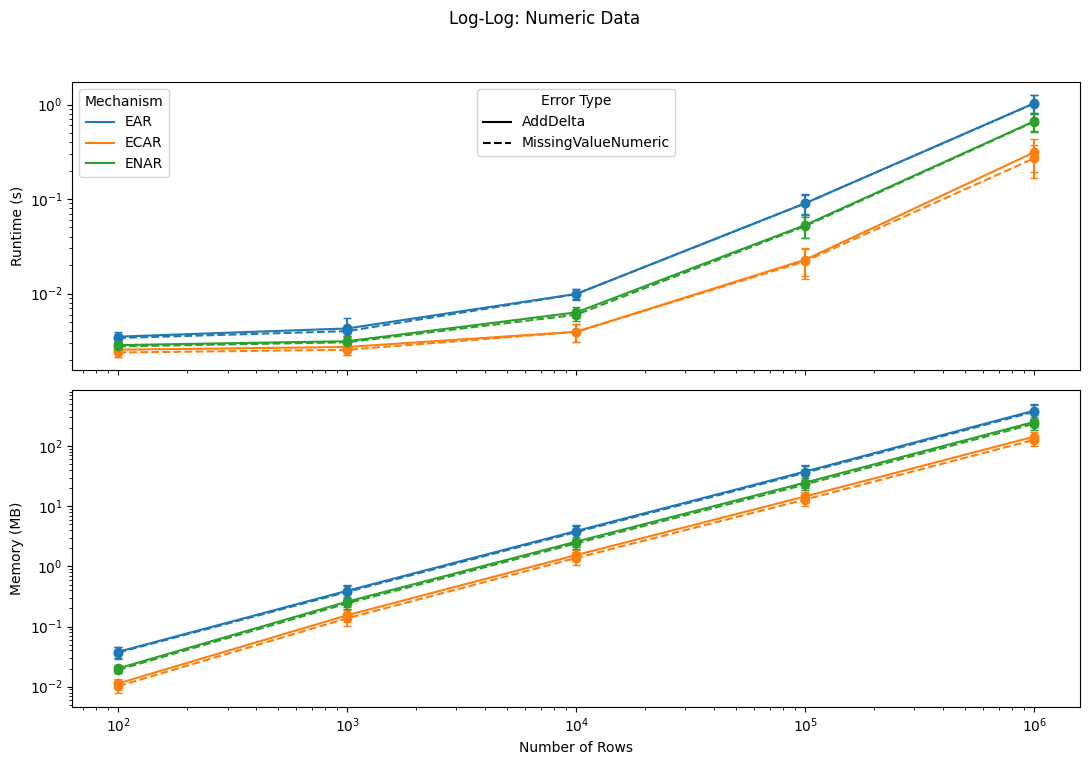

In [419]:
plot_runtime_memory(df_runtime, df_memory,
                    ['MissingValueString', 'Typo'],
                    'Log-Log: String Data')

plot_runtime_memory(df_runtime, df_memory,
                    ['MissingValueNumeric', 'AddDelta'],
                    'Log-Log: Numeric Data')